[2025-11-17 20:57:10] INFO: === Starting merge process ===


Normalizált leírás mentve ide: C:\Users\zalma\A\steam_description_data_cleaned.csv
Rekordok száma: 27334 | Oszlopok száma: 4
  appid                                  short_description
0    10  Play the world's number 1 online action game. ...
1    20  One of the most popular online action games of...
2    30  Enlist in an intense brand of Axis vs. Allied ...
3    40  Enjoy fast-paced multiplayer gaming with Death...
4    50  Return to the Black Mesa Research Facility as ...


[2025-11-17 20:57:50] INFO: Loaded: steam.csv (27075 rows)
[2025-11-17 20:57:51] INFO: Loaded: steam_description_data_cleaned.csv (27334 rows)
[2025-11-17 20:57:52] INFO: Loaded: steam_media_data.csv (27332 rows)
[2025-11-17 20:57:52] INFO: Loaded: steam_support_info.csv (27136 rows)
[2025-11-17 20:57:53] INFO: Loaded: steamspy_tag_data.csv (29022 rows)
[2025-11-17 20:57:53] INFO: Loaded: steam_requirements_data.csv (27319 rows)
[2025-11-17 20:57:55] INFO: SteamSpy tags converted → 28447 appid with tag data
[2025-11-17 20:57:55] INFO: A source merged: 27075 rows
[2025-11-17 20:58:00] INFO: A source saved: C:\Users\zalma\merge\A_merged.csv
[2025-11-17 20:58:12] INFO: B source loaded from JSON: 111452 rows
[2025-11-17 20:58:25] INFO: B source saved: C:\Users\zalma\merge\B_full.csv
[2025-11-17 20:58:32] INFO: Loaded: games_march2025_cleaned.csv (89618 rows)
[2025-11-17 20:58:38] INFO: Loaded: games_march2025_full.csv (94948 rows)
[2025-11-17 20:58:44] INFO: Loaded: games_may2024_cleaned.c

Venn-diagram mentve ide: C:\Users\zalma\merge\venn_diagram.png


[2025-11-17 20:59:28] INFO: Merging sources with C→B→A priority...


Elemszámos Venn-táblázat mentve ide: C:\Users\zalma\merge\venn_table.csv

=== Elemszámos Venn-diagram táblázat ===
 csak A  csak B  csak C  A ∩ B  A ∩ C  B ∩ C  A ∩ B ∩ C
   1234    5731     161   1400      8  79888      24433


[2025-11-17 20:59:52] INFO: Merge complete (112855 rows, 63 columns)
[2025-11-17 20:59:57] INFO: Normalized thumbnail screenshots for source A (27075 items)
[2025-11-17 20:59:57] INFO: Normalized thumbnail screenshots for source B (111452 items)
[2025-11-17 21:00:03] INFO: Normalized thumbnail screenshots for source C (104490 items)
[2025-11-17 21:00:05] INFO: Normalized movies for source A (25393 items)
[2025-11-17 21:00:06] INFO: Normalized movies for source B (111452 items)
[2025-11-17 21:00:10] INFO: Normalized movies for source C (104490 items)
[2025-11-17 21:01:44] INFO: Combined duplicate tag columns: ['tags_x', 'tags_y'] → kept unified 'tags'
[2025-11-17 21:01:57] INFO: Dropped redundant column: steamspy_tags
[2025-11-17 21:02:06] INFO: Cleaned and normalized language field: supported_languages
[2025-11-17 21:02:14] INFO: Cleaned and normalized language field: full_audio_languages
[2025-11-17 21:02:25] INFO: Final language cleanup on supported_languages: 542206 → 542160 entries


=== Forrásonkénti rekordösszesítő táblázat ===
forrás_kombináció  rekordok_száma  tartalmaz_A  tartalmaz_B  tartalmaz_C
              C,B           79888        False         True         True
            C,B,A           24433         True         True         True
                B            5731        False         True        False
              B,A            1400         True         True        False
                A            1234         True        False        False
                C             161        False        False         True
              C,A               8         True        False         True

=== Integritás ellenőrzési összesítő ===
              ellenőrzés  hibák_száma
      Duplikált appid-ek            0
        Hiányzó appid-ek            0
      Hiányzó játéknevek            0
   Hiányzó forrásjelölés            0
Érvénytelen release_date            8
=== Hisztogramok generálása indul ===


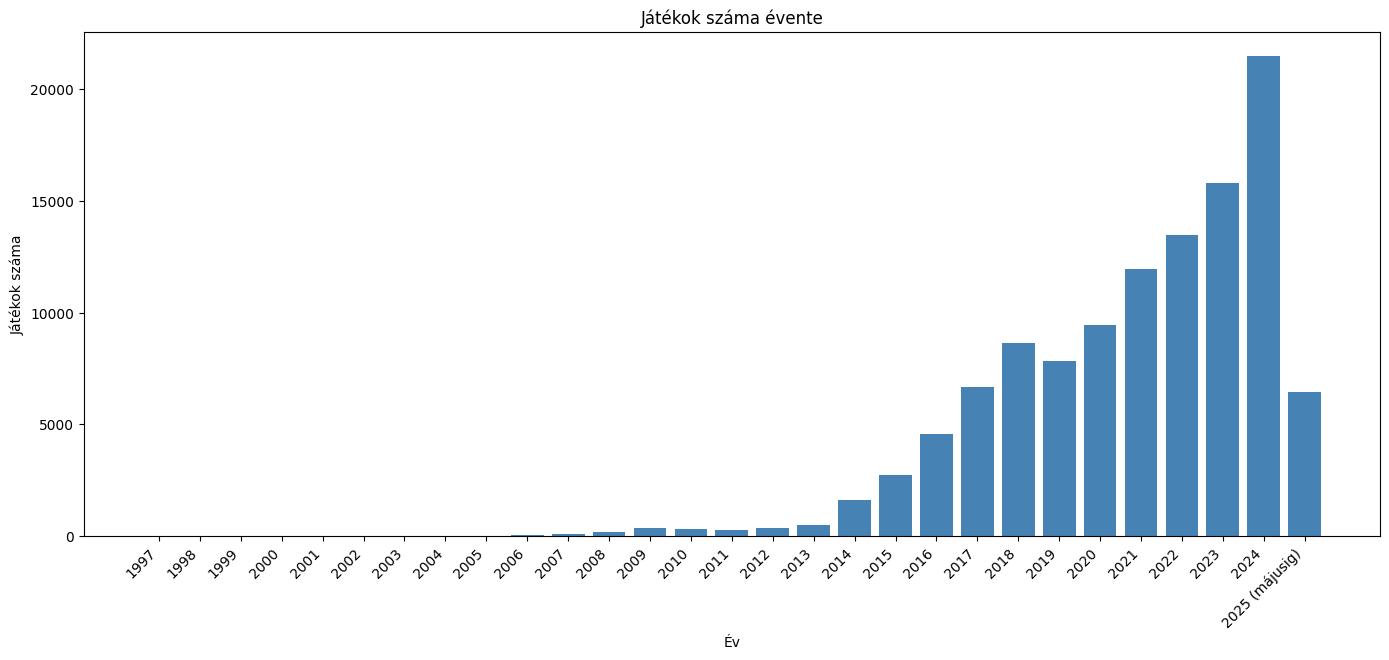

Mentve: C:\Users\zalma\merge\output\hist_all_years.png


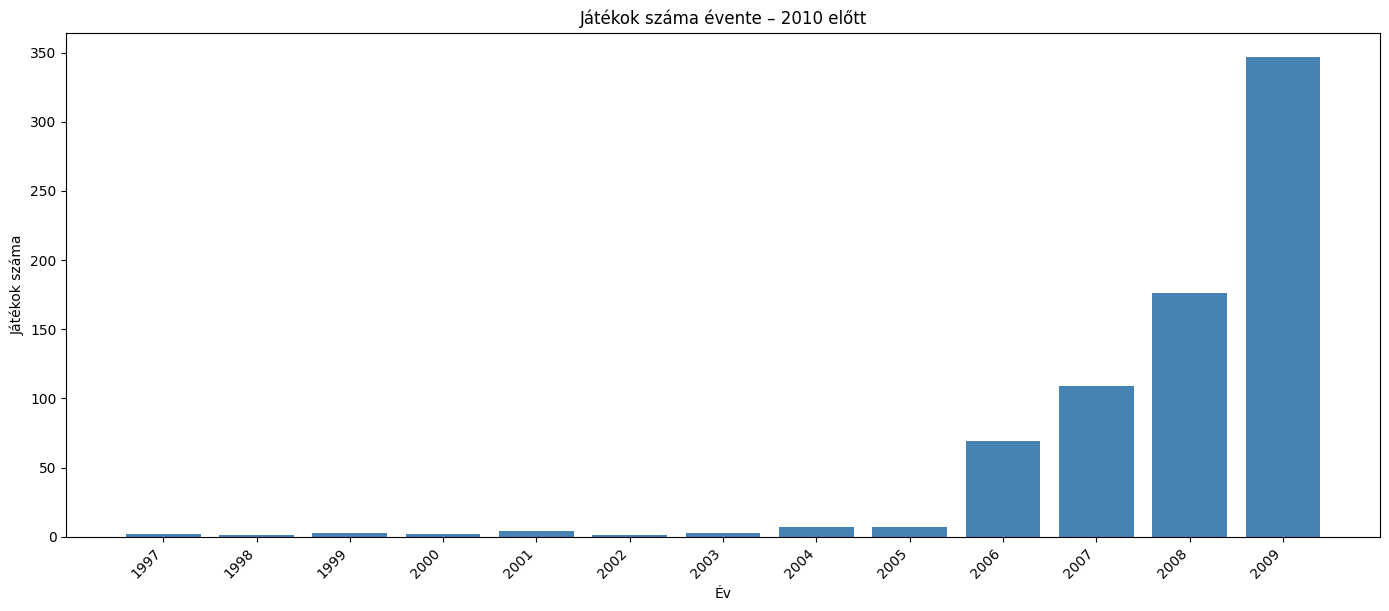

Mentve: C:\Users\zalma\merge\output\hist_pre2010.png


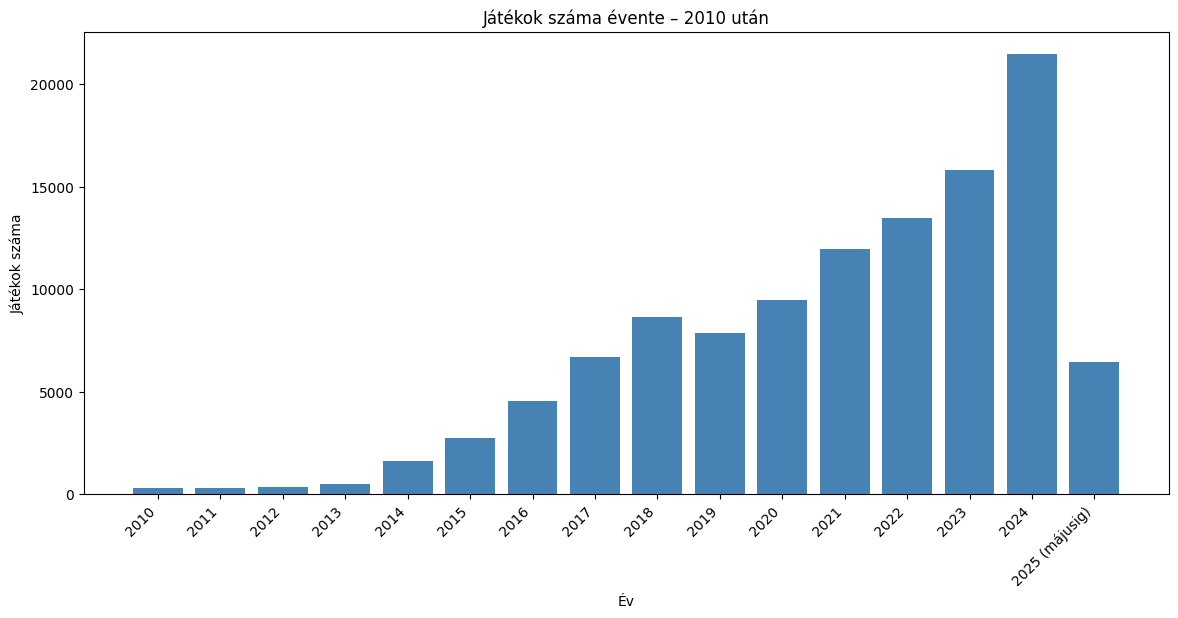

Mentve: C:\Users\zalma\merge\output\hist_post2010.png


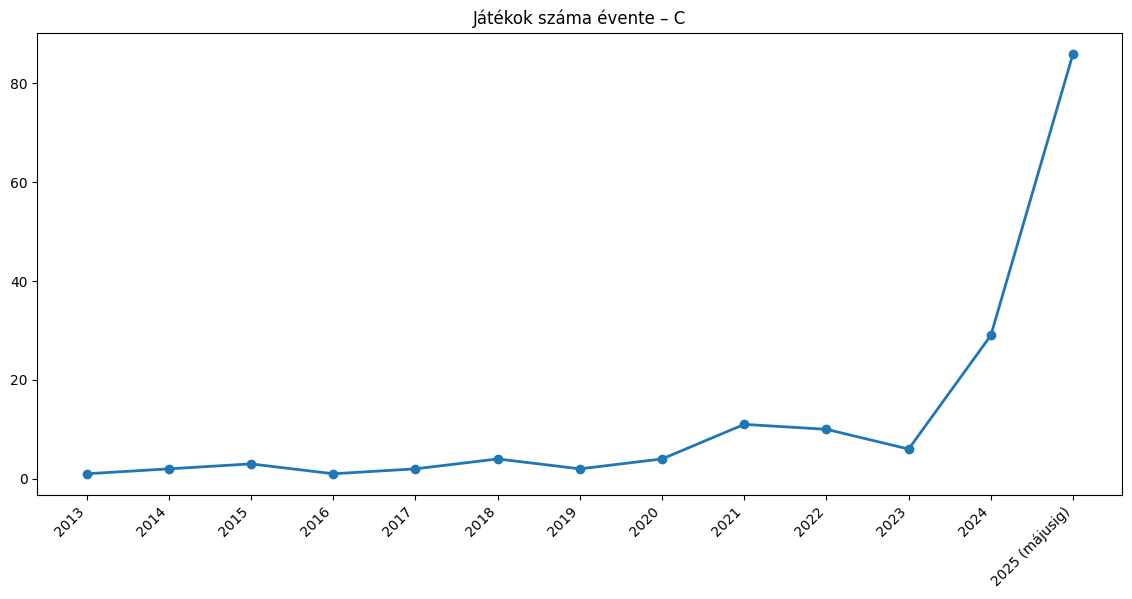

Mentve: C:\Users\zalma\merge\output\hist_sources_C.png


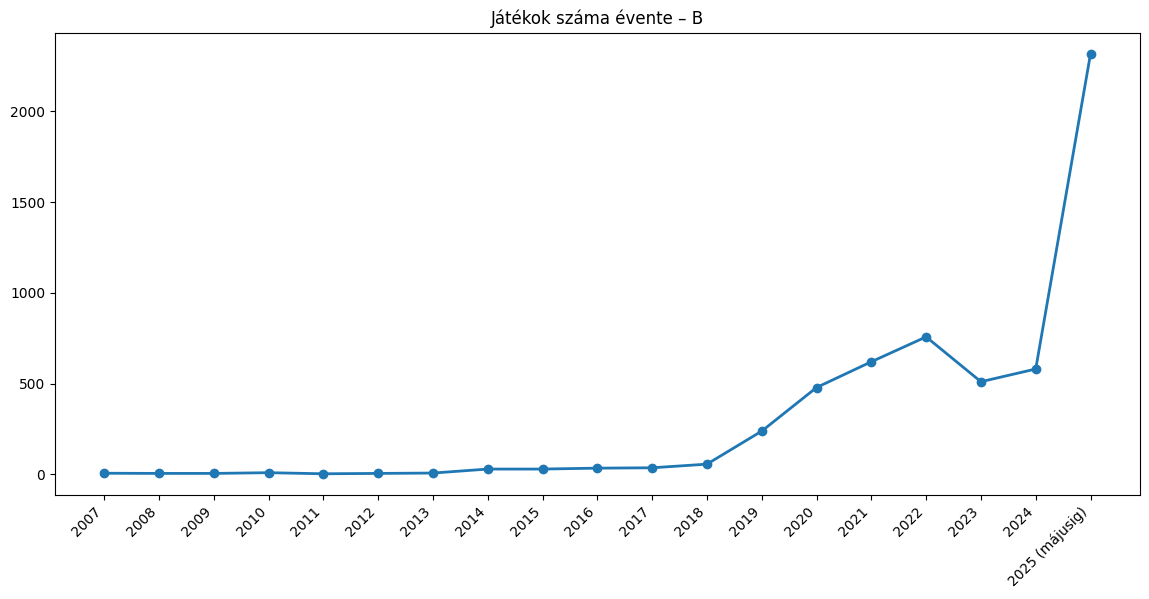

Mentve: C:\Users\zalma\merge\output\hist_sources_B.png


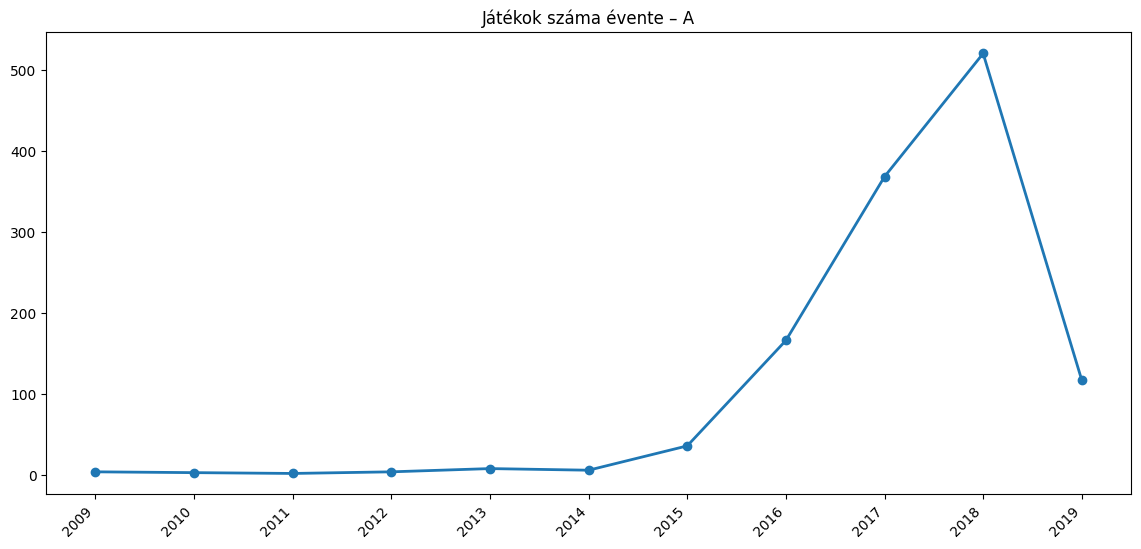

Mentve: C:\Users\zalma\merge\output\hist_sources_A.png


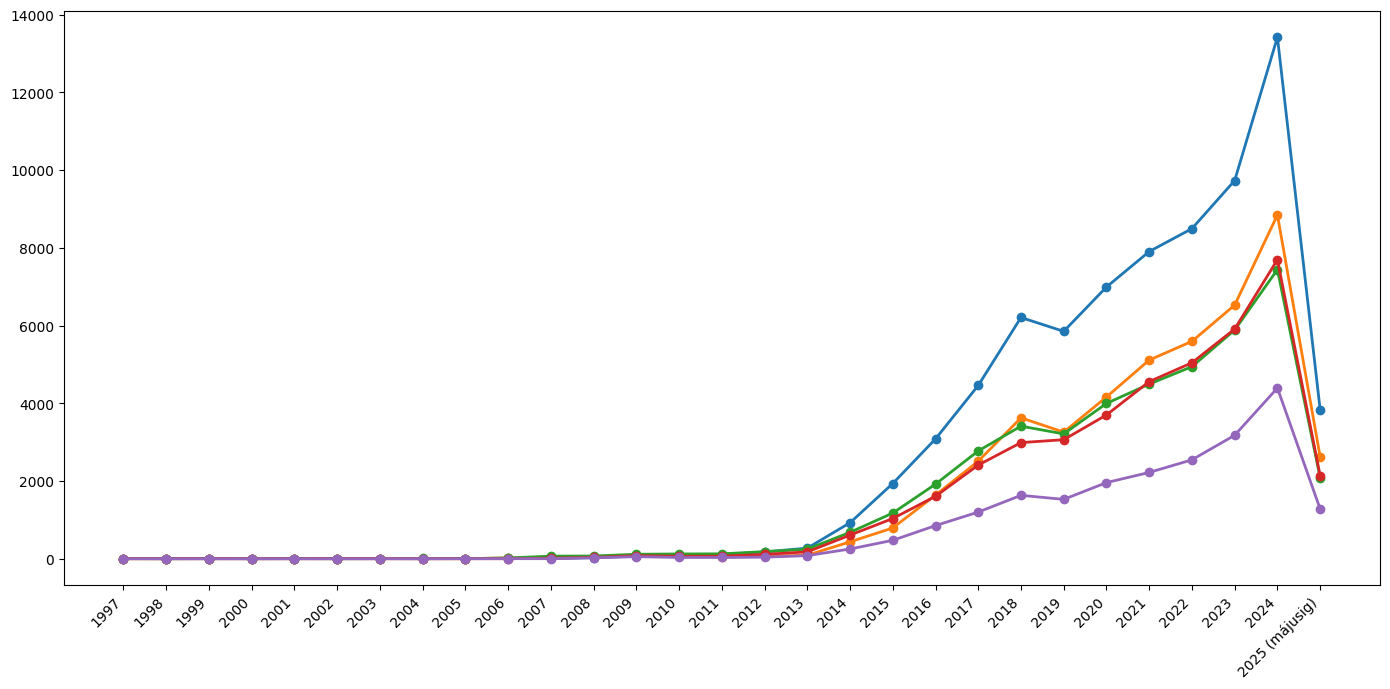

[2025-11-17 21:03:11] INFO: === Merge process successfully completed ===


Mentve: C:\Users\zalma\merge\output\hist_genres_top5.png
=== Hisztogramok elkészültek és fájlba mentve. ===


In [1]:
# ======== PATH FIX JUPYTERHEZ ========
import sys, os
sys.path.append(os.path.abspath(".."))
import warnings

from merge.config import *

# ======== IMPORTOK ========
from merge.utils.io_utils import save_merged
from merge.utils.clean_utils import *
from merge.utils.normalize_utils import *
from merge.utils.category_utils import *
from merge.utils.merge_utils import *

from merge.sources.source_a import load_source_a
from merge.sources.source_b import load_source_b
from merge.sources.source_c import load_source_c
from merge.sources.clean_description import main as clean_descriptions

from merge.visualization.venn_diagram import plot_and_save_venn
from merge.visualization.summaries import *
from merge.visualization.histograms import main as generate_histograms


# ======== MAIN PIPELINE ========
def main():
    warnings.filterwarnings("ignore", category=FutureWarning)
    logging.info("=== Starting merge process ===")

    clean_descriptions()
    
    a = load_source_a(A_PATH)
    a_output_file = os.path.join(OUTPUT_PATH, "A_merged.csv")
    a.to_csv(a_output_file, index=False, encoding="utf-8-sig")
    logging.info(f"A source saved: {a_output_file}")

    b = load_source_b(B_PATH)
    b_output_file = os.path.join(OUTPUT_PATH, "B_full.csv")
    b.to_csv(b_output_file, index=False, encoding="utf-8-sig")
    logging.info(f"B source saved: {b_output_file}")

    c = load_source_c(C_PATH)
    c_output_file = os.path.join(OUTPUT_PATH, "C_full.csv")
    c.to_csv(c_output_file, index=False, encoding="utf-8-sig")
    logging.info(f"C source saved: {c_output_file}")

    plot_and_save_venn(a, b, c, OUTPUT_PATH)

    d = merge_and_finalize(a, b, c)
    output_file = save_merged(d, OUTPUT_PATH)
    logging.info(f"Merged master table saved to: {output_file}")

    save_source_summary(d, OUTPUT_PATH)
    validate_integrity(d, OUTPUT_PATH)

    logging.info("=== Generating histograms ===")
    generate_histograms()

    logging.info("=== Merge process successfully completed ===")


# ======== FUTTATÁS ========
if __name__ == "__main__":
    main()
